# Self-Driving Car Engineer Nanodegree


## Project: Build a Traffic Sign Recognition Classifier


---
##  Load The Data

In [1]:
# Load pickled data
import pickle

# Importing other libraries
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Visualize

In the below cells I will add some visualizations.

First up, as is often important in machine learning tasks, we need to check the distribution of the data; in this case, how many of each sign we have in our dataset. If it is too skewed, the model might appear to get a high training accuracy while deciding just to constantly misclassify some of the small classes.

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

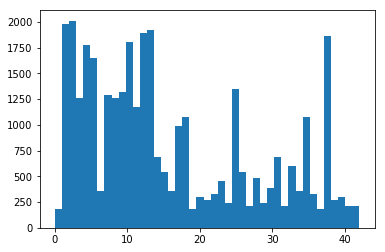

In [3]:
### Data exploration visualization goes here.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Making a histogram for the distribution
plt.hist(y_train, bins = n_classes)

Ok, so this looks a little bit skewed. This might create an issue. I'll come back to this later.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
import cv2

# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

In [5]:
from numpy import newaxis

print('Preprocessing training data...')

# Iterate through grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]

# Normalize
X_train = normalize(X_train) 

print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_train.shape
print("Processed training data shape =", image_shape2)

print('Preprocessing testing data...')

# Iterate through grayscale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize(X_test) 

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')

Preprocessing training data...
Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 1)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
All data preprocessing complete.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

Answer: My supposition was that for the signs I took a gander at in the gave .csv file, there would not have been a ton of extra data picked up from rgb versus grayscale, so grayscaling could make the neural system speedier and conceivably enable it to concentrate more on what was critical.
Likewise, I standardized the information in the vicinity of .1 and .9, like what was talked about in one of the TensorFlow addresses, with the goal that I could keep numerical dependability for any of the bigger scientific successions happening. This helps downsize a portion of the dissimilarity inside the information. Additionally, utilizing .1 to .9 stays away from any potential issues caused by permitting the information down to zero (which could possibly separate a few conditions the street).

In [6]:


# I will generate some additional data, then split the data in a later cell.
# This is to help with the issue identified in the original histogram
from scipy import ndimage
import random

# min_desired below is just mean_pics but wanted to make the code below easier to distinguish
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics)

print('Generating new data.')

# Angles to be used to rotate images in additional data made
angles = [-10, 10, -15, 15, -20, 20]

# Iterate through each class
for i in range(len(pics_in_class)):
    
    # Check if less data than the mean
    if pics_in_class[i] < min_desired:
        
        # Count how many additional pictures we want
        new_wanted = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(new_wanted):
            
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
        
        # Append the pictures generated for each class back to the original data
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print('Additional data generated. Any classes lacking data now have', min_desired, 'pictures.')

Generating new data.
Additional data generated. Any classes lacking data now have 809 pictures.


Let's check how the new distribution of data looks.

The updated number of training examples = 46714


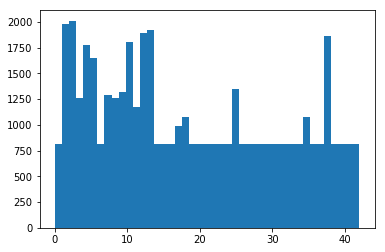

In [7]:
plt.hist(y_train, bins = n_classes)

updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)

Now the classes that I lacked data in have been brought up to the mean. It looks a little funky, but the neural network now has a lot more examples to go off of for the classes that did not have sufficient data in the original dataset; this should help avoid it overfitting to only the largest classes.

In [8]:
# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split

# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('Dataset successfully split for training and validation.')

Dataset successfully split for training and validation.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Answer: To include the extra information, I iterated through each class, and for each class than was underneath the mean number of pictures for all classes, I went further to include pictures. The genuine extra information was created from the officially existing pictures in each class, by having the circle pick an irregular point to pivot utilizing scipy's 'ndimage.rotate' work. I had it experience the circle until the point when enough of these extra pictures were produced to ascend to the mean. This is the reason the histogram winds up having a huge amount of classes at a similar spot, as that was the mean of the first information. For the preparation and approval information, I split up the preparation dataset utilizing sklearn's 'train_test_split'. I likewise rearranged the information just before the split so I wouldn't wind up putting the majority of a couple of signs into the approval set, with none in the preparation set (which would get the model better than average at the preparation set yet unfit to do anything on the test set). 



In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

EPOCHS = 10
BATCH_SIZE = 150

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias
    
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    # Note: The second layer is implemented the exact same as layer one, with layer 1 as input instead of x
    # And then of course changing the numbers to fit the desired ouput of 10x10x16
    # Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias
    
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Although this is fully connected, the weights and biases still are implemented similarly
    # There is no filter this time, so shape only takes input and output
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias
    
    # Activation for the first fully connected layer.
    # Same thing as before
    fc1 = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected. Input = 84. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits

In [10]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [11]:
# Setting learning rate, loss functions, and optimizer
rate = 0.005

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


Answer: My system is a convolutional neural system, as these have a tendency to do with pictures. I for the most part utilized an indistinguishable design from the LeNet neural system did, with 2 convolutional layers and 3 completely associated layers. I additionally did a couple of endeavors with one less convolutional layer (which sped it up by a better than average sum however dropped the precision) and one less completely associated layer (which just possibly dropped the exactness). 

One thing I changed from the fundamental LeNet structure was adding dropout to the completely associated layers. In spite of the fact that this makes introductory ages in approval somewhat more regrettable, I picked up an extra 3% on test exactness. Since I was getting to approval exactness of around 97%, with test precision around 88-89%, there was obviously a tad bit of overfitting being finished. Dropout got my test precision into the 90's by keeping some of that overfitting. I put dropout at 0.7 likelihood as that tended to in any case approve at an average rate inside a worthy number of ages over a lower number, for example, 0.5. Additionally, I changed max pool to normal pool as that appeared to marginally build exactness. 

Note likewise that because of grayscaling, and including back a measurement (see above) for profundity, the contributions for my system should be at 32x32x1, rather than the first 32x32x3 that the information had at first.

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, 'C:/Users/teja/lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.833

EPOCH 2 ...
Validation Accuracy = 0.911

EPOCH 3 ...
Validation Accuracy = 0.946

EPOCH 4 ...
Validation Accuracy = 0.953

EPOCH 5 ...
Validation Accuracy = 0.960

EPOCH 6 ...
Validation Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.976

EPOCH 10 ...
Validation Accuracy = 0.978

Model saved


In [17]:
# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, "./lenet")

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy: 0.9080759882926941


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


Answer: I used the AdamOptimizer from inside TensorFLow to streamline, which appeared to improve the situation than a standard Gradient Descent Optimizer. Additionally, I attempted a couple of various bunch sizes (see beneath), however settled at 150 as that appeared to perform superior to anything cluster sizes bigger or littler than that. I ran just 10 ages, principally because of time and further execution picks up, as it was at that point touching base at about 97-98% approval exactness, and further ages brought about just minor additions while proceeding to build time caused in preparing. Furthermore, there is no assurance that further change in approval precision does something besides just overfit the information (in spite of the fact that adding dropout to the model helps in such manner). 

For the model hyperparameters, I stayed with a mean of 0 and standard deviation/sigma of 0.1. A critical part of the model is endeavoring to keep a mean of 0 and equivalent difference, so these hyperparameters endeavor to take after this logic. I attempted a couple of other standard deviations however found a littler one didn't generally help, while a bigger one inconceivably expanded the preparation time vital.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

Answer: I went through a couple of things for each paramater with a specific end goal to tune my model further. The consequences of this are demonstrated as follows; not this isn't a genuine framework seek as I was just tuning one parameter at any given moment rather than checking each blend of the beneath things. For speed's purpose, I adhered to 10 ages, despite the fact that there is unquestionably a potential had I went through something like 100 ages to enhance the approval exactness while in the meantime touching base at a superior last test score. The default generally utilized was a learning rate of .01, 150 group measure, 2 convolutional layers and 3 completely associated layers (which is after a tiny bit of figure and check as of now). 

Learning rate after 10 ages: 

.1 = .040 

.01 = .976 .005 = .983 .001 = .973 

Clump measure after 10 ages: 

250 = .967 

150 = .976 

50 = .043 

Less layers after 10 ages: 

2 convolutional, 3 completely associated = .976 

1 convolutional, 3 completely associated = .944 

2 convolutional, 2 completely associated = .979 (this turned out somewhat superior to the 2 convolutional and 3 completely associated above, yet given the closeness I favored the marginally more profound model as there was no distinction in speed. I picked this since I thought the extra layer that included dropout would help against overfitting). 

As the CNN with 2 convolutional layers, 3 completely associated, a learning rate of .005 and a cluster estimate 150 seems to bring about the ideal CNN, I used this for the last model.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

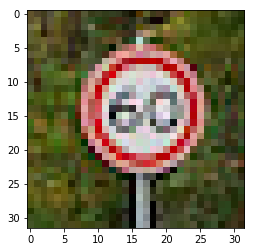

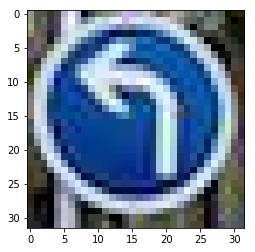

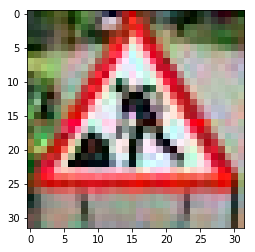

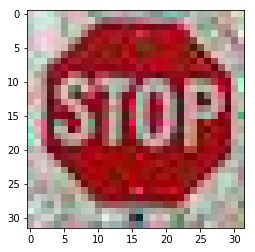

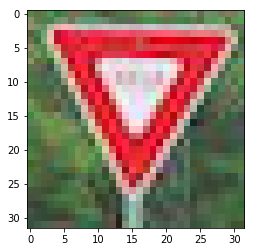

In [32]:

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Importing the images, and let's take a look at what we have!
import os
import matplotlib.image as mpimg
add_pics = os.listdir("add_pics/")
add_pics = add_pics[1:6]

# Show the images, add to a list to process for classifying
add_pics_data = []
for i in add_pics:
    i = 'add_pics/' + i
    image = mpimg.imread(i)
    add_pics_data.append(image)
    plt.imshow(image)
    plt.show()

In [33]:
# Make into numpy array for processing
add_pics_data = np.array(add_pics_data)

# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
print(add_pics_data.shape)

(5, 32, 32, 3)


In [34]:
print('Preprocessing additional pictures...')

# Iterate through grayscale
add_pics_data = preprocess(add_pics_data)
add_pics_data = add_pics_data[..., newaxis]

# Normalize
add_pics_data = normalize(add_pics_data) 

print('Finished preprocessing additional pictures.')

# Double-check that the image is changed to depth of 1
new_image_shape = add_pics_data.shape
print("Processed additional pictures shape =", new_image_shape)

Preprocessing additional pictures...
Finished preprocessing additional pictures.
Processed additional pictures shape = (5, 32, 32, 1)


In [36]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet")

    new_pics_classes = sess.run(logits, feed_dict={x: add_pics_data, keep_prob : 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


In [37]:
### Visualize the softmax probabilities here.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 9.60790825  7.69482756  6.52622032  3.15420198  2.63049269] 
 and predicted classes: [10  5  9  7  3]
Image 1 probabilities: [ 7.26507092  6.33769846  2.28182721  0.20671663 -0.16464728] 
 and predicted classes: [34 38 14 26 28]
Image 2 probabilities: [ 22.07051849  11.1653862    4.30737972   0.40111449  -0.6176846 ] 
 and predicted classes: [18 27 26 20 24]
Image 3 probabilities: [ 14.01185989   2.77783346   0.96089506   0.94375664   0.33720914] 
 and predicted classes: [14 33 17 15 38]
Image 4 probabilities: [ 12.34413338   6.23858595   5.15533543   2.28014231  -0.48314303] 
 and predicted classes: [13 35 12 38  9]


question 8:
answer
For the main picture, the 60 km/h sign, as I expected, it got the way that it was a speed sign right, yet tragically thought it was the 80 km/h sign. Given the most noteworthy likelihood was just around 3%, the model unquestionably battles recognizing speed signs (the best four probabilities are all speed signs). For the second (left turn), it sadly got it as a "No Vehicles" sign first; in any case, the second most elevated likelihood is the right answer of the Left Turn Ahead. I'm reasonably interested by the model putting the No Vehicles sign here, as it really arrives in the best five for four of the five signs I took a gander at. It should fundamentally be centered around the sign being round for that one. 
For the third, it mistakenly surmises need street. I trust this is because of the sign shape. Fairly strangely, it never surmises the street work sign by any means. This might be because of the predetermined number of ages (10) I kept running on the model - the many-sided quality of the internal shape might be troublesome for the model to learn in such a brief span (if by any stretch of the imagination). It accurately surmises both the fourth and fifth pictures! It is substantially more certain on the caution sign than anything it thought on the others. Along these lines, my model just worked precisely on 40% of the extra pictures. In any case, it likewise effectively recognized the 60 km/h sign as a speed sign, and was genuinely close on the Left Turn Ahead sign, so with some tweaking of either the model or further preprocessing of the pictures, I wager I could get to no less than 80% on these. This is obviously still lower than the about 93% accomplished on the test information, yet at the same time would be genuinely useful for not having curated the pictures precisely like whomever did as such on the first dataset.
